# **Reynara Ezra Pratama**

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 285 µs (started: 2021-07-18 12:47:51 +00:00)


In [3]:
path = "/content/Iris.csv"
df = pd.read_csv(path)

time: 15.3 ms (started: 2021-07-18 12:47:51 +00:00)


In [4]:
print(df.shape)

(150, 6)
time: 1.85 ms (started: 2021-07-18 12:47:52 +00:00)


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


time: 19.1 ms (started: 2021-07-18 12:47:52 +00:00)


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


time: 16.7 ms (started: 2021-07-18 12:47:52 +00:00)


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


time: 25.9 ms (started: 2021-07-18 12:47:52 +00:00)


In [8]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


time: 32.5 ms (started: 2021-07-18 12:47:52 +00:00)


In [9]:
df.drop('Id', axis=1, inplace=True)

time: 2.34 ms (started: 2021-07-18 12:47:52 +00:00)


In [10]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

time: 5.5 ms (started: 2021-07-18 12:47:52 +00:00)


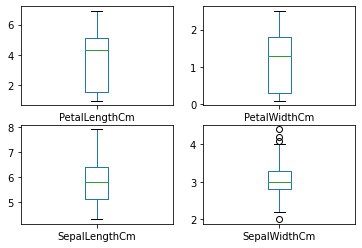

time: 363 ms (started: 2021-07-18 12:47:52 +00:00)


In [11]:
import matplotlib.pyplot as plt

df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']].plot(kind='box', subplots=True, layout=(2,2))
plt.show()

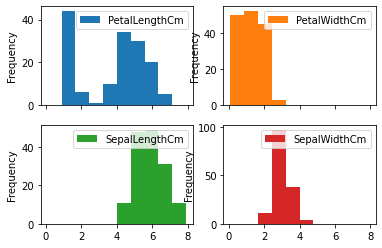

time: 759 ms (started: 2021-07-18 12:47:52 +00:00)


In [12]:
df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']].plot(kind='hist', subplots=True, layout=(2,2))
plt.show()

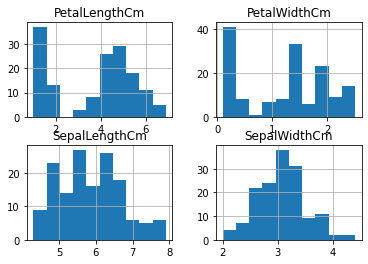

time: 443 ms (started: 2021-07-18 12:47:53 +00:00)


In [13]:
df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']].hist()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

data = df.values

X = data[:,0:4]
Y = data[:,4]
val_size = 0.2
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=val_size, random_state=seed)

time: 318 ms (started: 2021-07-18 12:47:53 +00:00)


In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

scores = []
names = []

for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed)
  cv_score = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  scores.append(cv_score)
  names.append(name)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

time: 353 ms (started: 2021-07-18 12:52:02 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [27]:
for i in range(6):
  print('Model :', names[i])
  print('Accuracy :', scores[i].mean())
  print('Std :', scores[i].std())
  print('\n')

Model : LR
Accuracy : 0.9833333333333332
Std : 0.03333333333333335


Model : CART
Accuracy : 0.9833333333333332
Std : 0.03333333333333335


Model : KNN
Accuracy : 0.9833333333333332
Std : 0.03333333333333335


Model : LDA
Accuracy : 0.975
Std : 0.03818813079129868


Model : NB
Accuracy : 0.975
Std : 0.053359368645273735


Model : SVM
Accuracy : 0.9833333333333332
Std : 0.03333333333333335


time: 2.96 ms (started: 2021-07-18 12:52:20 +00:00)


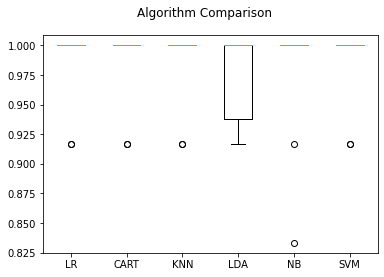

time: 147 ms (started: 2021-07-18 12:52:23 +00:00)


In [28]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()